In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 범주형 특성들 처리방법
- 더미 변수를 이용해서 처리

In [2]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header = None, index_col=False, 
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status',
                          'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
                          'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print('원본 특성 : \n', list(data.columns))
data_dummies = pd.get_dummies(data)
print('더미 특성 : \n', list(data_dummies.columns))

원본 특성 : 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
더미 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-serv

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
X = features.values
y= data_dummies['income_ >50K'].values
X.shape, y.shape

((32561, 44), (32561,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)

print('test score : {:.4f}'.format(logreg.score(X_test, y_test)))

test score : 0.8087


# 숫자로 표현된 범주형 특성
- str로 바꿔주면 된다.

In [8]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1], '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,범주형 특성,숫자 특성
0,양말,0
1,여우,1
2,양말,2
3,상자,1


In [9]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [10]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 구간 분할, 이산화, 선형모델, 트리모델
- 

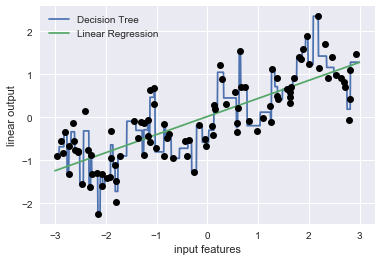

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = 'Decision Tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label = 'Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('linear output')
plt.xlabel('input features')
plt.legend(loc='best')

## 구간 분할/이산화 (bining)
- 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할(bining)/이산화이다.
- np.digitize 함수는 각 데이터 포인트가 어느 구간에 속하는지 기록한다. 
- 첫번째 구간은 -3~-2.4, 1과 10사이의 구간이 되지만, -3보다 작은 포인트의 구간은 0이 되고, 3보다 크거나 같은 포인트의 구간은 11이 된다 .

In [12]:
bins = np.linspace(-3, 3, 11)
print('구간 : {}'.format(bins))

구간 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
which_bin = np.digitize(X, bins=bins)
print('\n데이터 포인트 \n', X[:5])
print('\n데이터 포인트의 소속 구간:\n', which_bin[:5])


데이터 포인트 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
# 변환을 위해 원핫 인코더 사용
encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾는다.
encoder.fit(which_bin)
# 원-핫 인코딩으로 변환
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
print('x_binned.shape : {}'.format(X_binned.shape))

x_binned.shape : (100, 10)


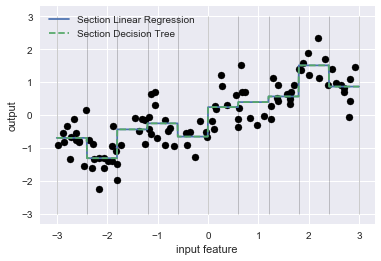

In [16]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Section Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Section Decision Tree')
plt.scatter(X[:, 0], y,  c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('output')
plt.xlabel('input feature')

- 선형 회귀 모델과 결정 트리가 완전히 같은 예측을 하였다.
- 각 구간 안에서는 특성의 값이 상수이므로, 어떤 모델이든 같은 값은 예측할 것이다. 
- 결정트리는 원래 자유롭게 데이터를 나눠서 학습할 수 있으므로, 인위적으로 구간을 나누는 것은 득이 되지 않는다. 
- 반면 선형회귀는 좋은 성능을 가져오게 되었다. 

# 상호작용과 다항식
- 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 방법이 있다. 
- 첫번째로 선형 모델이 위와 같은 절편 뿐만 아니라 기울기도 학습 할 수 있다.
- 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가하는 것이다. 
- 10개로 나눠진 10개의 feature와 1개의 feature를 합쳐 모두 11개의 feature가 된다.

In [17]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


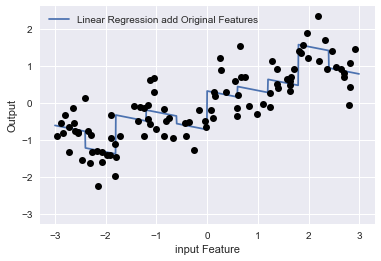

In [18]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Linear Regression add Original Features')

for bi in bins:
    plt.plot([bi, bi], [-3, -3], ':', c='k', linewidth=1)
plt.legend(loc='best')

plt.ylabel('Output')
plt.xlabel('input Feature')
plt.plot(X[:, 0], y, 'o', c='k')

In [19]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


- 각 구간의 절편과 기울기를 학습하였으나, 모든 구간에서 기울기가 같으므로 좋지 않은 성능을 낸다.
- 각 구간의 기울기를 다르게 설정하기 위해 x축 사이의 상호작용 특성을 추가하는데 이는 구간 특성과 원본 특성의 곱이다.
- 10개로 나누어진 특성과, 각 특성에 원본 특성을 곱한 특성을 더해 총 20개의 특성을 가지게 된다.

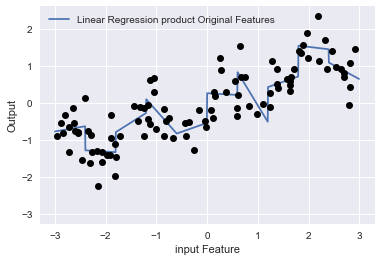

In [20]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Linear Regression product Original Features')

for bi in bins:
    plt.plot([bi, bi], [-3, -3], ':', c='k', linewidth=1)
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Output')
plt.xlabel('input Feature')

- 구간 나누기는 연속형 특성을 확장하는 방법이다. 
- 원본특성의 다항식을 추가하는 방버ㅗ 있다.
- 특성 x가 주어ㅣ면  x ** 2, x ** 3, x ** 4 등을 시도해볼수 있다.
- preprocessing 모듈의 PolynomialFeatures에 구현되어있다.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# X ** 10까지 고차항을 추가
# 기본값인 'include_bias=True'는 절편을 위해 값이 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [22]:
print("X_poly,shape :", X_poly.shape)

X_poly,shape : (100, 10)


In [23]:
print('X 원소 : \n', X[:5])
print('X_poly 원소 : \n', X_poly[:5])

X 원소 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소 : 
 [[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [24]:
print('항 이름 : \n', poly.get_feature_names())

항 이름 : 
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


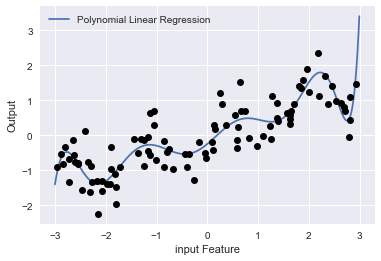

In [25]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Polynomial Linear Regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Output')
plt.xlabel('input Feature')

- 매우 부드러운 곡선을 만들지만, 양 끝과 같이 데이터가 부족한 영역에서 너무 민감하게 동작한다.
- 반면 커널 SVM모델을 아무런 변환을 하지않은 데이터에 학습시키면 다항회귀와 비슷한 복잡한 예측을 만들 수 있다.

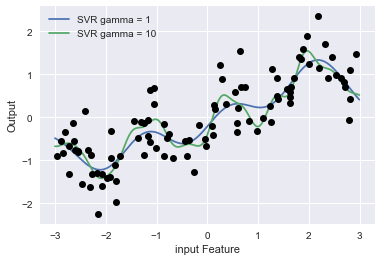

In [26]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma = {}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Output')
plt.xlabel('input Feature')

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape ", X_train.shape)
print("X_train_poly.shape ", X_train_poly.shape)

X_train.shape  (379, 13)
X_train_poly.shape  (379, 105)


- degree = 2로 하면 원본 특성에서 제곱은 물론 가능한 두 특성의 조합을 모두 포함하게 된다. 

In [28]:
print('다항 특성 이름 : \n', poly.get_feature_names())

다항 특성 이름 : 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성 없을 때의 점수 : {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge.fit(X_train_poly, y_train)
print('상호작용 특성 있을 때의 점수 : {:.3f}'.format(ridge.score(X_test_poly, y_test)))

상호작용 특성 없을 때의 점수 : 0.621
상호작용 특성 있을 때의 점수 : 0.753


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print('상호작용 특성 없을 때의 점수 : {:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf.fit(X_train_poly, y_train)
print('상호작용 특성 있을 때의 점수 : {:.3f}'.format(rf.score(X_test_poly, y_test)))

상호작용 특성 없을 때의 점수 : 0.795
상호작용 특성 있을 때의 점수 : 0.773


- 특성을 추가하지 않아도 특성을 추가한 Ridge와 성능이 비슷하지만, 오히려 상호작용 다항식을 추가하여 성능이 줄어들었다.

# 일변량 비선형 변환
- 특성을 추가하는 것 외에도 log, exp, sin같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다.
- 트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델가 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어있다. 
- 그리고 특성과 타깃값 사이의 비선형성이 있다면, 특히 선형 회귀에서는 모델을 만들기가 어렵다.
- log와 exp함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 준다.
- 대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 낸다.
- 즉 틍성의 히스토그램이 종 모양과 비슷할 때이다.
- log 변환이나 exp 변환은 이런 모양을 만드는 쉽고 효과적인 방법이다.
- 특히 도움이 되는 전형적인 경우는 정수 카운트 데이터를 다룰 때이다.(예를 들어 사요자가 얼마나 자주 로그인하는가?)
- 카운트에는 음수가 없고, 특별한 통계 패턴을 따르는 경우가 많다.

In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [32]:
print('특성 출현 힛수 : \n', np.bincount(X[:, 0]))

특성 출현 힛수 : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


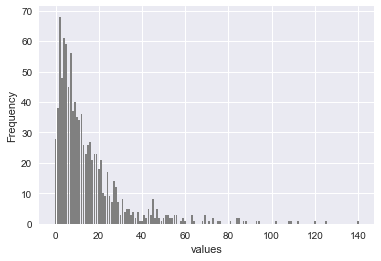

In [33]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.xlabel('values')
plt.ylabel('Frequency')

In [34]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수 : ', score)

테스트 점수 :  0.622418623631


In [35]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

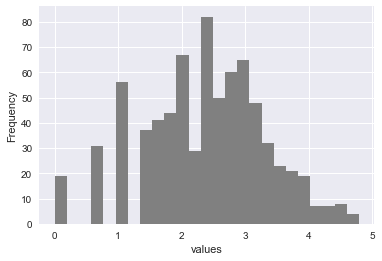

In [36]:
plt.hist(X_train_log[:, 0], bins=25, color='grey')
plt.xlabel('values')
plt.ylabel('Frequency')

In [37]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수 : ', score)

테스트 점수 :  0.874934237289


- 위와 같이 로그변환을 사용하면 정규분포 모양에 가깝게 되고, 이러한 데이터로 학습을 시키면 더 우수한 점수를 얻는다.
- 실제로는 이 예처럼 모든 특성이 같은 속성을 가지는 것은 거의 없다.
- 이런 변환은 트리 기반 모델에서는 불필요하지만, 선형 모델에서는 필수적이다.
- 구간 분할, 다항식, 상호작요은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 끼칠 수 있다.
- 특히 선형 모델이나 나이브 베이즈 모델같은 덜 복잡한 모델일 경우 큰 성과를 가진다.
- 트리 기반모델은 스스로 중요한 상호작용을 찾아낼수 있으므로 큰 의미는 없다.
- SVM, KNN, 신경망 같은 모델은 이득을 볼 수 있지만, 선형모델보다는 영향이 뚜렷하지 않다.

# 특성 자동선택
- 새로운 특성을 만드는 방법이 많으므로, 데이터의 차원이 원본 특성의 수 이상으로 증가하면, 모델은 더 복잡해지고, 과대적합의 원인이 된다.
- 가장 유용한 특성만 선택하고, 나머지는 무시해서 특성의 수를 줄이는 것이 조다.
- 일변량 통계, 모델기반 선택, 반복적 선택이 있다. 

## 일변량 통계
- 일변량 통계에서는 개개의 특성과 타깃 사이의 중요한 통계적 관계가 있는지를 계산하여, 깊게 관련되어 있다는 특성을 선택하는데, 이를 분산분석(ANOVA) 라고 한다.
- 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 것이다.
- 분류에서는 f_classif를, 회귀에서는 f_regression을 선택하여 테스트한다.
- 계산된 p-value에 기초하여 특성을 제외하는 방식을 선택한다.

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성, 다음 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size = .5)
# f_claaif(기본값)과 SelectPercentile을 이용하여 특성의 50퍼센트를 선택
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print('X_train.shape : {}'.format(X_train.shape))
print('X_train_selected.shape : {}'.format(X_train_selected.shape))

X_train.shape : (284, 80)
X_train_selected.shape : (284, 40)


In [39]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


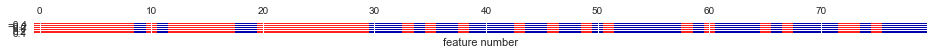

In [40]:
plt.matshow(mask.reshape(1, -1), cmap = mglearn.cm2)
plt.xlabel('feature number')

- 기대했던 데로, 선택된 특성은 대부분 원본 특성이다.

In [41]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 점수 :", lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
print("선택된 특성 사용 점수 :", lr.score(X_test_selected, y_test))

전체 특성 사용 점수 : 0.929824561404
선택된 특성 사용 점수 : 0.940350877193


- 일부 원본 특성이 없더라도 노이즈 특성을 제거한 쪽의 성능이 조금 더높다.
- 실제 데이터에서는 엇갈리는 경우도 많으나, 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 도움이 된다.
- 또는 많은 특성들이 확실히 도움이 안된다고 생각할 때 사용할 수 있다.

## 모델 기반 특성 선택
- 지도 학습 머신러닝 모델을 이용해 특성의 중요도를 평가해서 가장 중요한 특성들만 선택한다.
- 결정 트리와 이를 기반으로 한 모델들은 각 특성의 중요도가 담겨있는 feature_importances_를 제공한다.
- 선형 모델 계수의 절대값도 특성의 중요도를 재는데 사용할 수 있다.
- Ridge나 Lasso와 같은 모델은 다른 모델의 특성 선택을 위해 사용될 수도 있다.

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# SelectFromModel은 중요도가 지정한 임계치보다 큰 모든 특성을 선택
# 절반 가량의 특성이 선택될수 있도록 중간값을 임계치로 사용
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold='median')

In [43]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train_shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train_shape: (284, 80)
X_train_l1.shape: (284, 40)


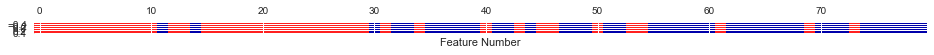

In [44]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = mglearn.cm2)
plt.xlabel('Feature Number')

- 두개를 제외한 모든 특성이 선택되었고, 그외에 일부 노이즈 특성도 선택되었다.

In [45]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수 : {:.4f}'.format(score))

테스트 점수 : 0.9509


## 반복적 특성 선택
- 반복적 특성 선택은 특성의 수가 각기 다른 일련의 모델이 만들어진다. 
- 첫 번째 방법 : 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 떄까지 하나씩 추가하는 방법
- 두 번쨰 방법 : 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법
#### 재귀적 특성 제거(RFE/ Recursive Feature Elimination)이 이런 방법의 하나
- 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거
- 제거한 특성을 뺴고 나머지 특성 전체로 새로운 모델 구축
- 이러한 과정을 정의한 특성 개수가 남을 때까지 반복


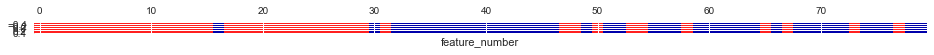

In [46]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state =42), n_features_to_select = 40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap=mglearn.cm2)
plt.xlabel('feature_number')

In [47]:
X_train_rfe = select.transform(X_train)
X_test_rfe =select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수 :', score)

테스트 점수 : 0.950877192982


In [48]:
# select로 바로 예측을 하면 선택된 특성만 사용하게 된다. 안에있는 모델인 랜덤포레스트로 scroing 
print('테스트 점수 : ', select.score(X_test, y_test))

테스트 점수 :  0.950877192982


- RFE 안에 있는 랜덤포레스트의 성능이 선택한 특성으로 만든 로지스틱 회귀와 같아진다.
- feature selection을 통해서 로지스틱 회귀의 성능이 랜덤포레스트와 동등해진다는 것을 의미

## 전문가 지식 활용
- 머신러닝의 목적은 전문가가 설계하는 규칙을 만들지 않기 위해서이지만, 그 분야의 전문 지식이 무시된다는 뜻은 아니다.
- 예를 들어 여행사를 위해 항공료를 예측해야할 때, 날짜, 항공사, 출발지, 도착지와 함께 가격을 기록할 수 있다.
- 이 경우 이 데이터만으로 괜찬은 머신러닝 모델을 만들 수 있지만, 항공료에 포함된 중요한 요소 몇 가지는 학습될 수 없다.
- 예를 들어 휴가 성수기나 공휴일 근처에서는 항공료가 훨씬 비싸집니다. 일부 공휴일은 날짜로부터 학습 가능하지만, 음력공휴일이나 방학같은 비정기 휴일같은 경우에는 데이터로부터 학습할 수 없습니다. 그러나 공휴일과 방학 전후의 비행 스케쥴이 기록된 특성을 추가하는 일은 어렵지 않다. 이런 식으로 작업에 내재된 사전지식이 특성으로 추가된다면 큰 도움이 될것이다.

- 
- 아래 예는 앤디 집 앞의 자전거가 대여 가능하지 예측하는 작업이다. 
- 우리가 풀려는 문제는 특정 날짜와 시간에 앤디집 앞에 있는 자전거를 사람들이 얼마나 대여할 지를 예측하는 것이다.
- 아래 데이터는 하루 동안의 3시간 단위 주요 경향이다 

In [49]:
citibike = mglearn.datasets.load_citibike()

citibike.head()

starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64

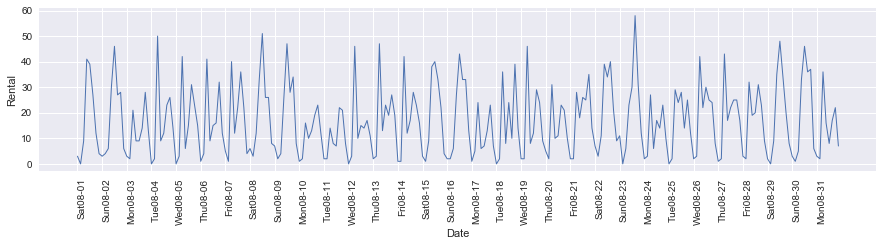

In [50]:
plt.figure(figsize =(15, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max())
week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
xticks_name = [week[int(w)]+ d for w, d in zip(xticks.strftime('%w'), xticks.strftime('%m-%d'))]

plt.xticks(xticks, xticks_name, rotation = 90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rental')

- 24 시간 간격으로 낮과 밤을 확실히 구분할 수 있다.
- 주중과 주말의 패턴도 꽤 차이가 난다. 이와 같은 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식을 사용한다.
- 데이터를 훈련 세트와 테스트 세트로 나눌 때, 어떤 날짜까지의 모든 데이터를 훈련 세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용
- 23일치 184개 데이터 포인트를 train data로, 나머지 8일차를 테스트세트로 사용한다.


In [51]:
# 타깃값 추출(대여 횟수)
y= citibike.values
# 컴퓨터에 날짜를 저장하는 일반적인 방법은 1970년 1월 1일 00:00:00으로부터 경과한 시간을 초로 나타낸 POSIX시간이다.
X = citibike.index.astype('int64').values.reshape(-1, 1)

In [55]:
# 처음 184개의 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용하여 평가하고, 그래프를 그린다.
def eval_on_features(features, target, regressor):
    #훈련 세트와 테스트 세트로 나눈다.
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('테스트 세트 r2 :', regressor.score(X_test, y_test))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha='left')
    
    plt.plot(range(n_train), y_train, label = 'train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='train prediction')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='test prediction')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('date')
    plt.ylabel('rental')

    

테스트 세트 r2 : -0.035486463626


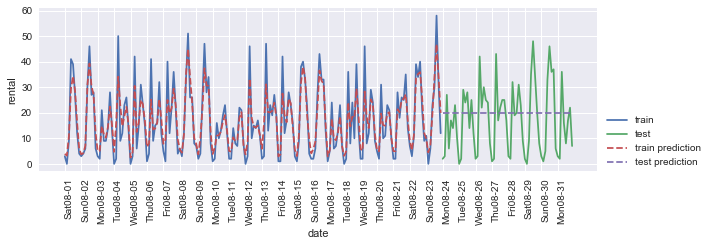

In [56]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state = 0)
eval_on_features(X, y, regressor)

- 훈련 세트의 예측은 매우 정확하지만, 테스트 셋에 대해서는 한 가지 값으로만 예측하여 수평선으로 나온다.
- 문제는 랜덤 포레스트와 특성 사이의 조합에 있다.
- 테스트 세트에 있는 POSIX 시간 특성의 값은 훈련 세트에 있는 특성 값의 범위 밖에 있다.
- 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 모든 데이터보다 뒤의 시간인데,
- 트리모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽(extrapolation)할 수 있는 능력이 없습니다.
- 결국 이 모델은 테스트 세트와 가장 가까이 있는 마지막 훈련 타깃값을 예측으로 그리게 된다. 
- 여기서 전문가 지식이 필요하다. 훈련 데이터의 대여 데이터 그래프를 보면 시간과 요일이라는 두 요소가 중요하다고 판단 가능하다.
- 이 두 특성을 추가하고, POSIX 시간 특성은 제외한다.

테스트 세트 r2 : 0.599577599331


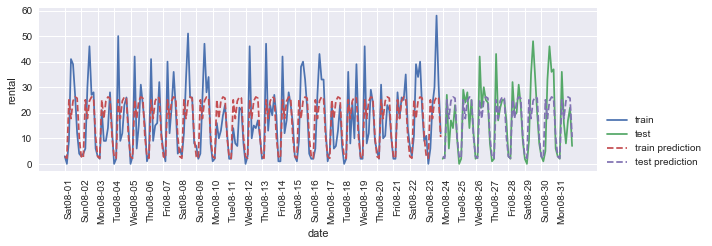

In [57]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

- 시간 정보만 더했음에도 R2의 향상을 볼수 있다. 이제 요일 정보도 추가해본다.

테스트 세트 r2 : 0.841948858797


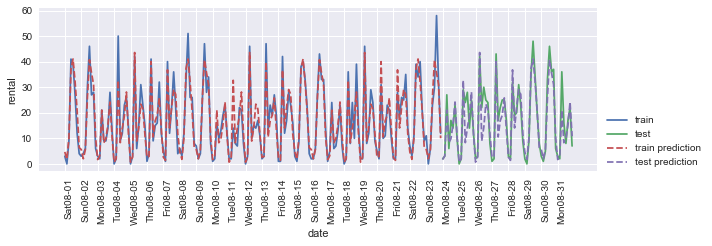

In [58]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])

eval_on_features(X_hour_week, y, regressor)

테스트 세트 r2 : 0.132041572622


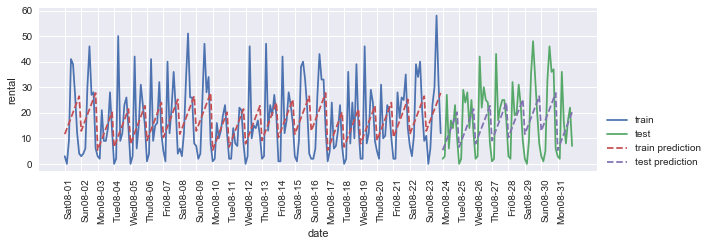

In [59]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

- 요일과 시간이 정수로 인코딩 되어있어서 연속형 변수로 해석되기 때문에 성능이 나쁘다.

테스트 세트 r2 : 0.619113916866


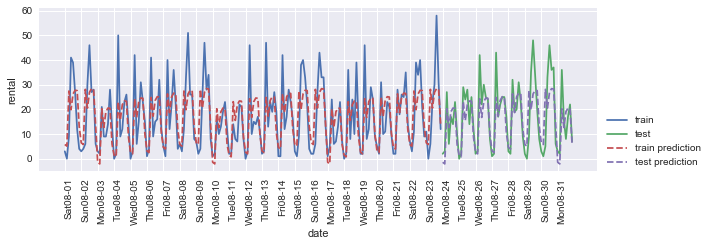

In [60]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 r2 : 0.845170635797


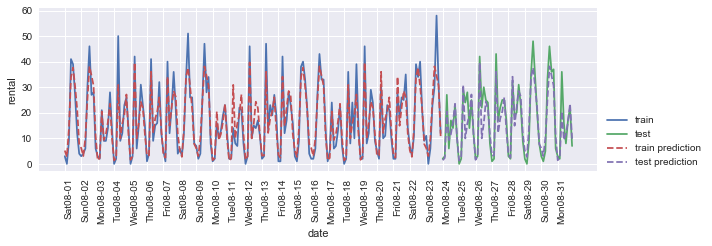

In [61]:
poly_transformer = PolynomialFeatures(degree = 2, interaction_only=True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [62]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ['mon', 'tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour
features_poly = poly_transformer.get_feature_names(features)
feature_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


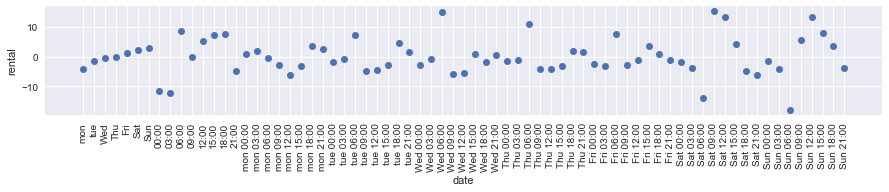

In [63]:
plt.figure(figsize = (15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), feature_nonzero, rotation = 90)
plt.xlabel('date')
plt.ylabel('rental')

# 요약
- 데이터를 다루는 방법에 대해 학습하였다.
- 원-핫-인코딩 범주형 변수처럼 머신러닝 알고리즘에 적합한 방식으로 데이터를 표현하는 것이 중요하다.
- 선형모델은 구간 분할이나, 다항식과 상호작용 특성을 새로 추가해 큰 이득을 볼 수 있다. 
- 반면, SVM이나 랜덤 포레스트같은 비선형 모델들은 특성을 늘리지 않고도 복잡한 문제를 학습할 수 있다.